In [3]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [6]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


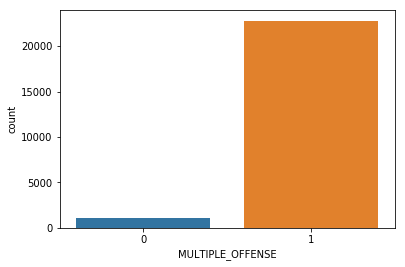

In [7]:
sns.countplot(data=df, x='MULTIPLE_OFFENSE')

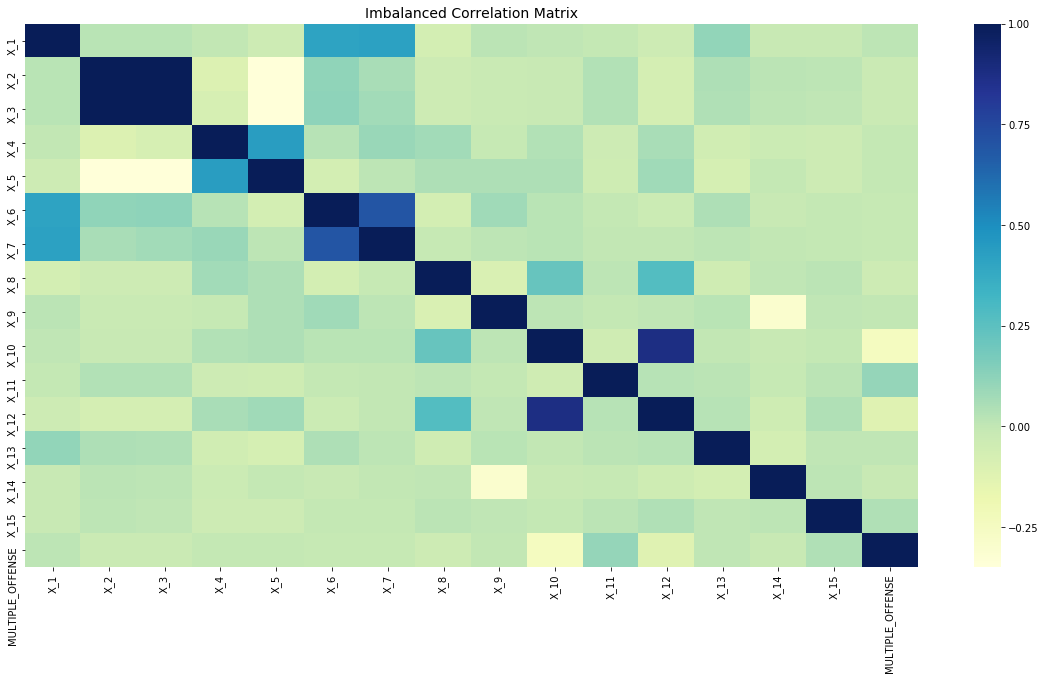

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [9]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [10]:
df.drop('INCIDENT_ID', axis=1,inplace=True)

In [11]:
df.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [12]:
li =  df['DATE'].str.split('-')

In [13]:
Month={'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10',
       'NOV':'11','DEC':'12'}

In [14]:
j=0
for i in li:
    t = Month[i[1]]
    li[j][1]=t
    j=j+1

In [15]:
type(li)

pandas.core.series.Series

In [16]:
li=li.to_list()
type(li)

list

In [17]:
df_Date = pd.DataFrame(li,columns=['Day','Month','Year'])

In [20]:
df_Date.head()

,Day,Month,Year
0,04,07,04
1,18,07,17
2,15,03,17
3,13,02,09
4,13,04,05


In [28]:
for i in list(df_Date.columns):
    print(i)
    df[i] = df_Date[i]

Day
Month
Year


In [30]:
df.drop('DATE', axis=1,inplace=True)

In [31]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,07,04
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,07,17
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,03,17
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,02,09
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,04,05


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 19 columns):
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
Day                 23856 non-null object
Month               23856 non-null object
Year                23856 non-null object
dtypes: float64(1), int64(15), object(3)
memory usage: 3.5+ MB


In [36]:
df[df['X_12'].isna()]

X_1                 182
X_2                 182
X_3                 182
X_4                 182
X_5                 182
X_6                 182
X_7                 182
X_8                 182
X_9                 182
X_10                182
X_11                182
X_12                  0
X_13                182
X_14                182
X_15                182
MULTIPLE_OFFENSE    182
Day                 182
Month               182
Year                182
dtype: int64

In [42]:
df.dropna(inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23674 entries, 0 to 23855
Data columns (total 19 columns):
X_1                 23674 non-null category
X_2                 23674 non-null category
X_3                 23674 non-null category
X_4                 23674 non-null category
X_5                 23674 non-null category
X_6                 23674 non-null category
X_7                 23674 non-null category
X_8                 23674 non-null category
X_9                 23674 non-null category
X_10                23674 non-null category
X_11                23674 non-null category
X_12                23674 non-null category
X_13                23674 non-null category
X_14                23674 non-null category
X_15                23674 non-null category
MULTIPLE_OFFENSE    23674 non-null category
Day                 23674 non-null category
Month               23674 non-null category
Year                23674 non-null category
dtypes: category(19)
memory usage: 675.4 KB


In [69]:
for col in list(df.columns):
    df[col] = df[col].astype('category')
    

In [81]:
df.nunique()

X_1                   8
X_2                  52
X_3                  52
X_4                  10
X_5                   5
X_6                  19
X_7                  19
X_8                  24
X_9                   7
X_10                 24
X_11                133
X_12                 23
X_13                 60
X_14                 61
X_15                 28
MULTIPLE_OFFENSE      2
Day                  31
Month                12
Year                 28
dtype: int64

In [79]:
from imblearn.over_sampling import smote

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SVMSMOTE()

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('MULTIPLE_OFFENSE', axis=1), df['MULTIPLE_OFFENSE'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = df.columns

In [80]:
oversampled_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,174.0,1.0,92.0,29.0,36.0,4.0,7.0,4.0
1,1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,236.0,1.0,103.0,142.0,34.0,18.0,7.0,17.0
2,1,0.0,3.0,2.0,3.0,5.0,1.0,0.0,2.0,3.0,1.0,174.0,1.0,110.0,93.0,34.0,15.0,3.0,17.0
3,1,0.0,33.0,32.0,2.0,1.0,7.0,1.0,1.0,6.0,1.0,249.0,1.0,72.0,29.0,34.0,13.0,2.0,9.0
4,1,0.0,33.0,32.0,2.0,1.0,8.0,3.0,0.0,5.0,1.0,174.0,0.0,112.0,29.0,43.0,13.0,4.0,5.0


In [75]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,04,07,04
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,07,17
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,03,17
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,02,09
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,04,05
